# <center> **Projeto Final - Aprendizado de Máquina** <center>

### <center> - *Análise de dados para previsão da temperatura crítica de supercondutores* - <center>

Guerreiros: **Tsuru** (Júlia Guedes Almeida dos Santos), **Pólux** (Raquel de Godoy Vianna) e **Tiles** (Thalles José de Souza Cansi).

> Uma andorinha sozinha não faz verão.

<div style="text-align: justify;">
O presente notebook objetiva apresentar a motivação para o projeto, para a escolha do banco de dados e do target, assim como realizar uma breve análise do dataset escolhido, voltada para o target selecionado e, por fim, separar o dataset em dados de treino e teste, divisão que será essencial para as implementações e análises dos próximos notebooks.

## 🏙️ **Introdução**

<div style="text-align: justify">
Supercondutores consistem em materiais que, ao se encontrarem abaixo de certa temperatura, denominada temperatura crítica,  perdem a resistência à passagem de corrente elétrica, bem como apresentam propriedades extremamente intrigantes - podendo ser usados, por exemplo, para a promoção da levitação magnética. A partir de sua descoberta em 1911, por intermédio do trabalho de Heike Kamerlingh-Onnes, a supercondutividade passou a ser procurada em diversos materiais, sobretudo em metais, visto que são naturalmente bons condutores. Para além da identificação de supercondutores, prever a temperatura crítica desses com base em outras de suas propriedades compreende um estudo interessante e incrivelmente útil. Isso porque a previsão desse aspecto de um supercondutor possibilita:

- Identificar quais materiais supercondutores seriam melhores para aplicação em certa área; 

- Acelerar o desenvolvimento tecnológico pautado em supercondutividade; 

- Possibilitar uma melhor compreensão no que tange aos princípios físicos relacionados à supercondutividade; 

- Entre outros avanços. 

Com isso, fica evidente que compreender e, se possível, prever a temperatura crítica é fundamental no que tange ao uso atual de supercondutores, assim como constitui uma forma de impulsionar o avanço científico e tecnológico nessa esfera tão promissora. [1]

Nesse âmbito, levando em consideração a relevância desta área para o contexto científico de modo geral, obteve-se um banco de dados acerca de supercondutores por meio do site UC Irvine - Machine Learning Repository [4]. De maneira sucinta, tal banco de dados é próprio para aprendizado de máquina, sendo resultante de um artigo publicado no periódico "Computational Materials Science", assim, ele apresenta diversas características de materiais supercondutores (no total 82), a exemplo do número de elementos que possuem, bem como a média de sua massa atômica, e, é claro, a temperatura crítica, assim como outras propriedades relevantes desses. Para saber mais detalhes sobre cada uma delas, recomenda-se fortemente a leitura do artigo contido nas referências. [3] 

Além disso, é extremamente necessário que tal dataset seja baixado e encontre-se contido no mesmo terminal que o presente notebook, visando o bom funcionamento dos códigos que serão apresentados a seguir. Nesse sentido, orienta-se que ele seja baixado por intermédio do Github do projeto, onde muitas outras informações sobre o trabalho podem ser acessadas, motivo pelo qual sua leitura como um todo é aconselhada. [8]

Deste modo, com base nos fatores destacados a priori, o objetivo do trabalho elaborado consiste em prever a temperatura crítica (na escala Kelvin), que corresponde ao ponto em que certo material se torna um supercondutor. Assim, tal propriedade dos supercondutores consiste no target deste estudo - valor a ser previsto pelos modelos utilizados ao longo do presente projeto.

</div>

### 📚 **Importação de bibliotecas**

Em primeiro lugar, as bibliotecas necessárias serão importadas abaixo.

In [8]:
import os
import pandas as pd
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

### ⚛️ **Importação do Dataset**

O dataset sobredito será importado e, sequencialmente, exibido:

In [9]:
df = pd.read_csv("../data/dataset_condutividade.csv", sep = ',')
display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


Após isso, é possível remover dados faltantes e exibir novamente o dataframe.

In [10]:
df = df.dropna()
display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


É notório que o número de linhas (rows) continuou a mesma inclusive após a remoção de possíveis dados faltantes, o que implica que o dataset escolhido não apresenta dados ausentes!

### 🗂️ **Estatísticas descritivas dos dados do target**

Visando uma melhor compreensão e análise dos dados referentes à temperatura crítica (``critical_temp``), que consiste no target do presente projeto, serão calculadas algumas estatísticas descritivas desses. Para isso, será utilizada a biblioteca `statistics`. As estatísticas escolhidas consistiram na média - visto que essa representa o modelo baseline que pode ser definido para os dados -, no desvio-padrão - visando uma comparação com as métricas de erro como o Erro quadrático Médio (RMSE) dos modelos a serem discutidos -, bem como na mediana e nos valores mínimo e máximo - utilizados para explicar a relação denotada entre a média e o desvio padrão. [3]

#### 🟡 **Média**

<div style="text-align: justify">
A média é calculada dividindo a soma de todos os valores de uma variável aleatória — neste caso, a temperatura crítica — pelo número total de valores [Fórmula 1]. Assim, a média representa uma tendência central, refletindo um valor intermediário entre os dados analisados. 
</div>

$$
\mu = \frac{1}{N} \sum_{i=1}^{N} X_i
$$


 <center> [Fórmula 1: Média]

In [11]:
media_temp_critica = st.mean(df['critical_temp'])
print(f"A média da temperatura crítica consiste em {media_temp_critica:.5f} K.")

A média da temperatura crítica consiste em 34.42122 K.


#### 🟡 **Mediana**

<div style="text-align: justify">
A mediana é o valor que divide uma variável aleatória em duas metades iguais, representando, assim, o ponto central dos dados analisados. Por ser menos suscetível à influência de outliers, a mediana é uma métrica mais robusta em situações onde há valores discrepantes.
</div>

In [12]:
mediana_temp_critica = st.median(df['critical_temp'])
print(f"A mediana da temperatura crítica consiste em {mediana_temp_critica} K.")

A mediana da temperatura crítica consiste em 20.0 K.


#### 🟡 **Desvio padrão**

<div style="text-align: justify">
O desvio padrão, calculado a partir da raiz quadrada da variância, compreende uma medida que exprime o quão distantes da média encontram-se os valores de uma variável aleatória - no caso, a temperatura crítica. Isso possibilita uma noção da distribuição dos dados.
</div>

$$
\sigma = \sqrt{\mathrm{Var(X)}} =  \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}
$$

<center> [Fórmula 2: Desvio Padrão]

In [13]:
desvio_padrao_temp_critica = st.stdev(df['critical_temp'])
desvio_padrao_temp_critica
print(f"O desvio padrão da temperatura crítica consiste em {desvio_padrao_temp_critica} K.")

O desvio padrão da temperatura crítica consiste em 34.25436244874411 K.


#### 🟡 **Valores mínimo e máximo**

<div style="text-align: justify">
Os valores mínimo e máximo, como os próprios nomes sugerem, são aqueles que representam, respectivamente, o menor e o maior valor do conjunto de dados analisados. Conhecer esses valores pode ser útil para compreender o resultado de algumas métricas, como a média e o desvio padrão.
</div>

In [27]:
min_temp_critica = min(df['critical_temp'])
print(f"O valor mínimo da temperatura crítica consiste em {min_temp_critica} K.")

O valor mínimo da temperatura crítica consiste em 0.00021 K.


In [26]:
max_temp_critica = max(df['critical_temp'])
print(f"O valor máximo da temperatura crítica consiste em {max_temp_critica} K.")

O valor máximo da temperatura crítica consiste em 185.0 K.


### Resumindo...

<div style="text-align: justify">
É notório que o desvio padrão e a média da temperatura crítica resultaram em números consideravelmente próximos, uma explicação plausível para tal fenômeno consiste na distribuição desigual dos dados do dataset que dizem respeito ao target escolhido, haja vista a presença de um outlier, bem como outros valores discrepantes. Essa relação é denotada levando em consideração os valores máximo e mínimo, que são muito distantes, assim como a representação gráfica do boxplot [Gráfico 1], onde é evidente a presença de um outlier e uma grande variação no que tange ao quarto quartil dos dados - o qual é representado pela considerável distância entre o topo da "caixa azul" e a linha preta mais acima no gráfico. Ou seja, pode-se afirmar que a majoritária parte dos dados se encontra próximo a mediana (tal como expresso pelo tamanho da caixa), no entanto, os dados com valores mais elevados, localizados no quarto quartil, estão mais dispersos e, portanto, acabam afetando a média, aumentando o seu valor.
</div>

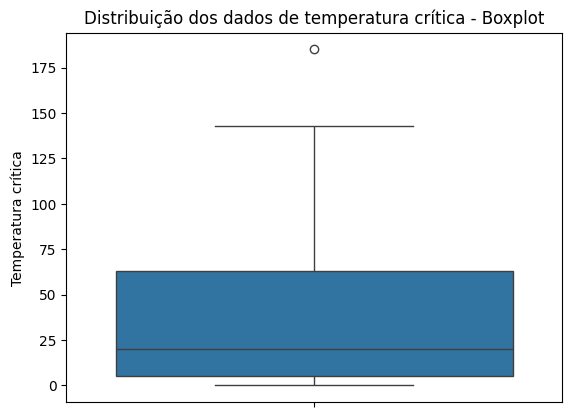

In [16]:
sns.boxplot(df['critical_temp'])
plt.ylabel("Temperatura crítica")
plt.title("Distribuição dos dados de temperatura crítica - Boxplot");

<center> [Gráfico 1: Boxplot do dataset]

### 🎯**Split de dados**

Para que ao final do processo seja possível analisar a eficácia do modelo, utilizando o método de validação cruzada pautada na métrica do RMSE, antes de tudo, é preciso separar o conjunto de dados entre dados de *treino* (80% dos dados originais) e dados de *teste* (20% restante dos dados), através da função ``train_test_split`` do módulo ``model_selection`` da biblioteca ``scikit-learn``. Para garantir a reprodutibilidade de tal split, uma semente aleatória - que se manterá a mesma para todos os processos realizados ao longo do trabalho - será definida e utilizada. 


In [17]:
semente_aleatoria = 101820
tamanho_teste = 0.2

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state=semente_aleatoria, shuffle=True
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]


Com a divisão de treino e teste estabelecida, agora é possível separar as colunas de ambos os dataframes em *target* (``critical_temp``) e *features* (demais colunas). É possível realizar essa divisão por meio dos índices das colunas no dataframe original.

In [18]:
features = list(df.columns)[:81]
target = [list(df.columns)[-1]]

*Dados de Treino*

In [19]:
df_treino_target = df_treino.reindex(target, axis=1)
df_treino_features = df_treino.reindex(features, axis=1)

*Dados de Teste*

In [20]:
df_teste_target = df_teste.reindex(target, axis=1)
df_teste_features = df_teste.reindex(features, axis=1)

<div style="text-align: justify">
A partir desses dataframes, é possível criar novos arquivos com extensão csv, a fim de que a divisão aqui estabelecida possa ser facilmente acessada nos demais notebooks do Projeto final.
</div>

In [21]:
df_treino_target.to_csv("df_treino_target.csv", index=False)
df_treino_features.to_csv("df_treino_features.csv", index=False)

df_teste_target.to_csv("df_teste_target.csv", index=False)
df_teste_features.to_csv("df_teste_features.csv", index=False)

<div style="text-align: justify">
Agora, serão estabelecidos os arrays que representam os dados de treino e, em seguida, os de teste, e são essenciais para a implementação dos modelos preditivos que serão introduzidos no decorrer do estudo em questão.
</div>

In [22]:
X_treino = df_treino_features.values
y_treino = df_treino_target.values.ravel()

X_teste = df_teste_features.values
y_teste = df_teste_target.values.ravel()

### ⚔️ **Desafio: É possível superar o baseline?**

Essa é a questão que norteará o desenvolvimento deste trabalho! No decorrer dele, o intuito é encontrar pelo menos um modelo capaz de prever o target sobredito apresentando uma métrica que seja melhor que a do baseline, modelo preditivo mais simples. Antes de tudo, porém, é de extrema importância definir tal conceito, visando a implementação desse modelo sequencialmente. Assim, este modelo consiste em um modelo linear, contudo, como só apresenta o intercepto, pois $\beta_1 = 0$, apresenta-se como uma função constante que possui valor igual à média de $y$, isto é, do target. Ou seja, de modo sucinto, é válido representar o modelo baseline como: [6]
$$
y = \beta_0 + \epsilon.
$$
<center> [Fórmula 3: Representação da baseline]<center>

Onde $\epsilon$ é o erro associado e $\beta_0$ consiste na média - ou valor esperado - de $y$ (target do modelo). Assim, tem-se:

$$
y = \mu + \epsilon.
$$

<center> [Fórmula 4: Representação da baseline como média]<center>

Visando criar um modelo baseline com o intuito de comparação a posteriori, será utilizado o `DummyRegressor` do `scikit-learn`. Tal processo é realizado a seguir.

In [23]:
modelo_baseline = DummyRegressor()

modelo_baseline.fit(X_treino,y_treino) 

y_previsto_baseline = modelo_baseline.predict(X_teste)

### 📏 **Métrica RMSE**

<div style="text-align: justify">
Métricas são ferramentas essenciais para a comparação da eficiência de modelos, haja vista que exprimem a performance do modelo por meio de um valor numérico. É interessante ressaltar a existência de diversas métricas, sendo que cada uma reporta algo sobre o comportamento do modelo analisado. Neste projeto, a métrica escolhida foi a raiz do erro quadrático médio (RMSE - root mean squared error, do inglês).

Resumidamente, a RMSE consiste na raiz quadrada do MSE - outra métrica de performance, de modo que é uma métrica intrigante, pois, já que apresenta a mesma unidade de medida do target observado, permite uma percepção de o quanto o modelo treinado está errando em média, motivo pelo qual tal métrica foi selecionada para sustentar a comparação entre os modelos deste trabalho. [5]

Abaixo, encontra-se exibida a fórmula matemática da RMSE.
</div>

$$
\mathrm{RMSE} = \sqrt{\mathrm{MSE}} = \sqrt{\sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{N}}.
$$

<center> [Fórmula 5: Raiz do erro quadrático médio - RMSE]

Onde N representa a quantidade de exemplos do conjunto de dados com base no qual a métrica é calculada, $y_i$ consiste no target do exemplo $i$, já $\hat{y}_i$ corresponde ao valor previsto pelo modelo para o exemplo $i$. [5]

### ✨ **Validação Cruzada**

<div style="text-align: justify">
A validação cruzada consiste em um método que contribui para a redução do efeito do acaso, e, por isso, representa uma boa estratégia para análise da performance de modelos, mas, cabe ressaltar que também pode ser utilizada para otimização de hiperparâmetros, como será apresentado em um próximo notebook.

À vista disso, no decorrer deste estudo, os modelos serão avaliados utilizando validação cruzada $k$​-fold, em que o conjunto de dados é segregado em $k$ subconjuntos distintos com mesmo tamanho (ou praticamente o mesmo tamanho). Em seguida, são realizadas iterações onde um desses subconjuntos é tido como teste enquanto o restante compreende os dados de treino (é importante denotar que isso ocorre de modo com que cada um dos subconjuntos seja o conjunto de teste somente uma vez). 

Para avaliar o modelo a ser estudado utilizando essa estratégia, ele é treinado e realiza-se $k$ estimativas da sua performance e, por fim, a média delas compreende a forma de avaliação do modelo em questão. Assim, evidencia-se que a menor susceptibilidade da validação cruzada ao efeito do acaso decorre do fato de que, por pautar-se na média das métricas, para o acaso nos influenciar negativamente, as $k$ previsões do modelo deveriam ser "azaradas", panorama consideravelmente improvável, sobretudo em comparação com uma única avaliação do modelo. [7]

</div>

Portanto, tendo em vista as considerações apresentadas acima, ressalta-se que, no decorrer deste estudo, visando uma análise mais confiável da performance dos modelos, eles serão avaliados utilizando validação cruzada. A seguir, com o intuito de encontrar a RMSE do modelo baseline, foi utilizada a função ``cross_val_score`` do módulo ``model_selection`` da biblioteca ``scikit-learn``.

In [24]:
scores_rl= cross_val_score(modelo_baseline, X_teste, y_teste, cv=10, scoring="neg_root_mean_squared_error")
RMSE_baseline = np.mean(scores_rl)
print(f"A média das métricas de RMSE do modelo baseline foi de {-RMSE_baseline} K.")

A média das métricas de RMSE do modelo baseline foi de 33.88748698048825 K.


<div style="text-align: justify">
Objetivando uma comparação entre os diferentes modelos que serão apresentados neste projeto, a métrica obtida a partir do modelo baseline será armazenada em um dataframe, que, com a implementação de outros modelos preditivos, será atualizado para conter cada uma das métricas analisadas.
</div>

In [25]:
modelos = ["Baseline"]
RMSE = [-RMSE_baseline]

df_RMSE = pd.DataFrame(RMSE, columns=modelos)
df_RMSE.to_csv("df_RMSE_resultados.csv")

display(df_RMSE)


,Baseline
0,33.887487


<div style="text-align: justify">

Depois de apresentar a proposta e a motivação do projeto, criar os dataframes de treino e teste, bem como da métrica do baseline (após ser implementado e avaliado), agora, resta "apenas" implementar outros modelos preditivos e analisar suas performances para, por fim, compará-las! Além disso, nos demais notebooks do trabalho, serão exploradas otimizações de hiperparâmetros e redução de dimensionalidade... Não perca tempo e vá para o próximo notebook (Desenvolvimento) para descobrir mais!

(Observação: O desenvolvimento do trabalho encontra-se dividido em três notebooks principais, cada qual tratando de um tipo de modelo implementado, bem como em um notebook apresentando análise da otimização e redução de dimensionalidade)

</div>

``Que a sede pela exploração da magia da predição esteja sempre com vocês! ⚔️``

## 📚 **Referências!**

[1] Branício, Paulo S. «Introdução à Supercondutividade, Suas Aplicações e a Mini-Revolução Provocada Pela Redescoberta Do MGB2: Uma Abordagem Didática». Revista Brasileira de Ensino de Física, vol. 23, n.o 4, dezembro de 2001. DOI.org (Crossref), https://doi.org/10.1590/S0102-47442001000400004.

[2] Hamidieh, Kam. «A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor». Computational Materials Science, vol. 154, novembro de 2018, pp. 346–54. DOI.org (Crossref), https://doi.org/10.1016/j.commatsci.2018.07.052.

[3] Hamidieh, Kam. Superconductivty Data. UCI Machine Learning Repository, 2018. DOI.org (Datacite), https://doi.org/10.24432/C53P47. 

[4] Daniel Roberto Cassar. (2024). Jupyter Notebook *LMA-203 1.0 - Estatística descritiva*. [Material não publicado].

[5] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas*. [Material não publicado].

[6] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 3.0 - Modelo linear e baseline*. [Material não publicado].

[7] Daniel Roberto Cassar. (2024). Jupyter Notebook *ATP-203 5.0 - Validação cruzada, busca aleatória e busca em grade*. [Material não publicado].

[8] Github do projeto: https://github.com/JuliaGuedesASantos/Machine-Learning---Cavaleiros-da-Supernova